# RealEstate-Price predictor 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df=pd.read_csv("HousingData.csv")


In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df['CHAS'].value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

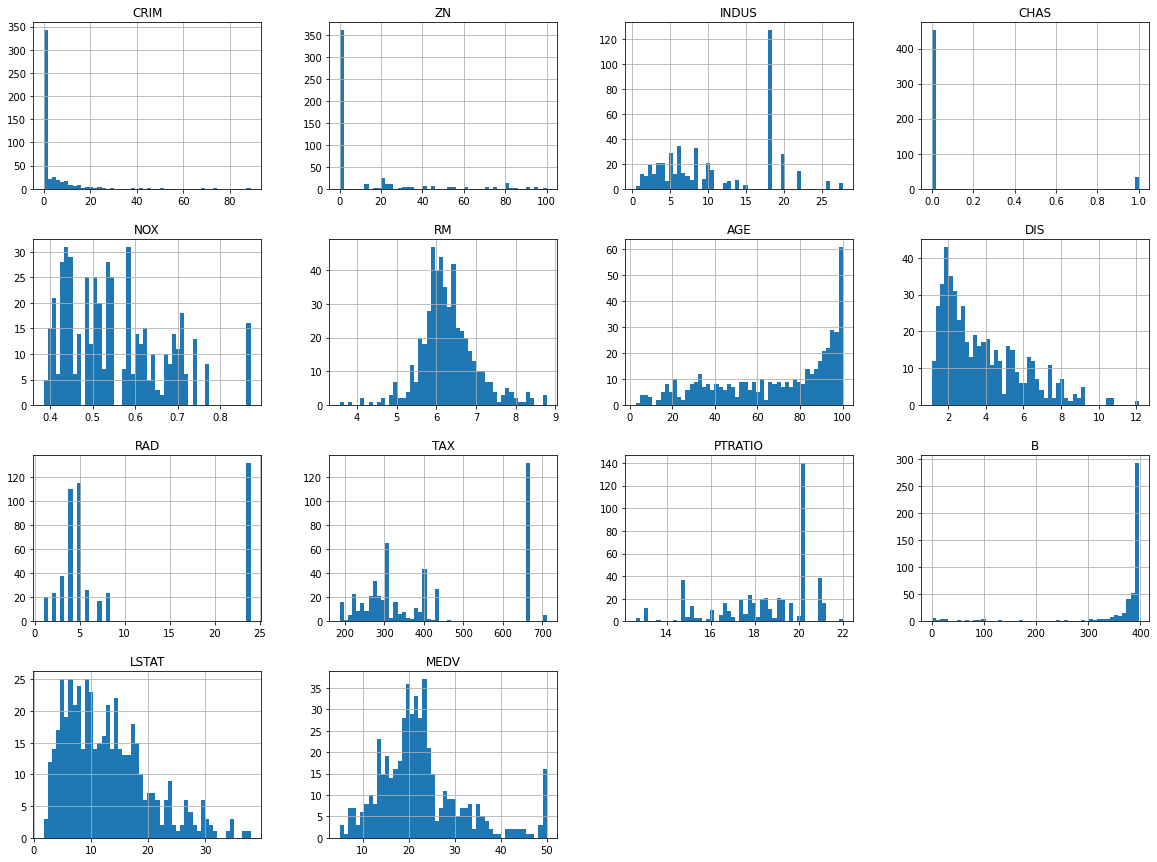

In [6]:
df.hist(bins=50,figsize=(20,15))

## Train- Test Spliting 

In [7]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    suff=np.random.permutation(len(data))
    #print(suff)
    test_set_size=int(len(data)*test_ratio)
    test_indices=suff[:test_set_size]
    train_indices=suff[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
train_set,test_set=split_train_test(df,0.2)

In [9]:
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in train set: 405
 Rows in test set: 101


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [12]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [13]:
##from sklearn.model_selection import StratifiedShuffleSplit
#sp=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
#sp.get_n_splits(df,df["CHAS"])
#print(sp)
#StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
#for train_index, test_index in sp.split(df,df["CHAS"]):
    #strat_train_set=df.loc[train_index]
    #strat_test_set=df.loc[test_index]
    

In [14]:
train_set['CHAS'].value_counts()

0.0    360
1.0     28
Name: CHAS, dtype: int64

In [15]:
test_set['CHAS'].value_counts()

0.0    92
1.0     6
Name: CHAS, dtype: int64

In [16]:
288/23

12.521739130434783

In [17]:
72/5

14.4

# Looking for Correlations

In [18]:
cor_matrix=df.corr()

In [19]:
cor_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

In [20]:
attr=["MEDV","RM","ZN","LSTAT"]

In [21]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

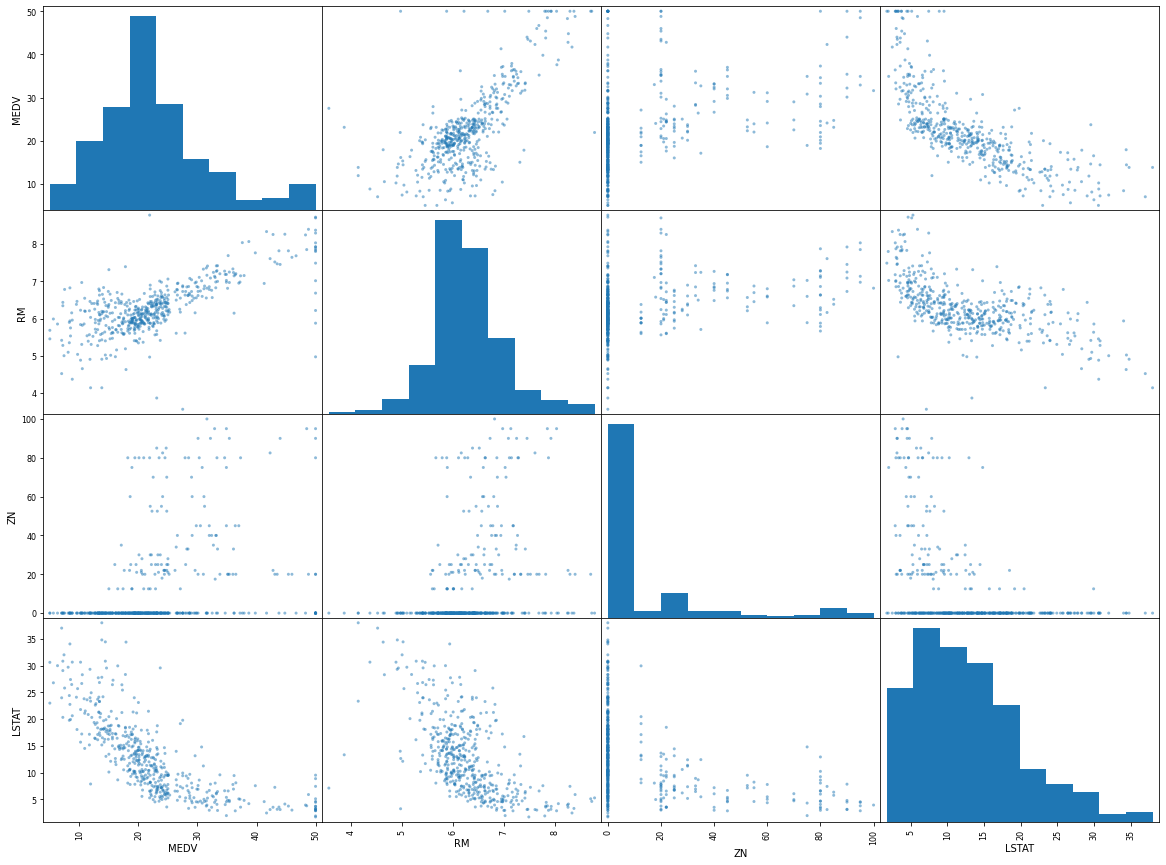

In [22]:
scatter_matrix(df[attr],figsize=(20,15))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

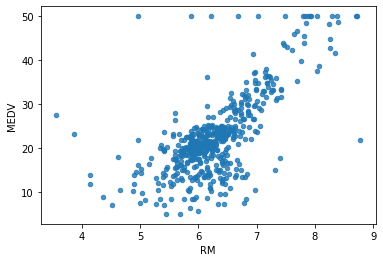

In [23]:
df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying Attribute combinations

In [24]:
df['TAXRM']=df['TAX']/df['RM']

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,31.061984


In [26]:
cor_matrix=df.corr()
cor_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.735822
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

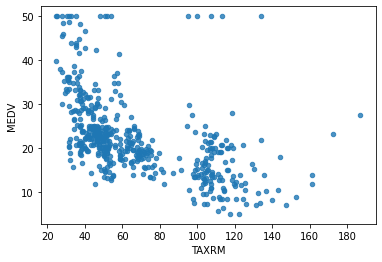

In [27]:
df.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

# Missing Attributes

In [28]:
df=train_set.drop("MEDV",axis=1)
housing_labels=train_set["MEDV"].copy()

In [29]:
a=df.dropna(subset=["RM"])
a.shape

(404, 13)

In [30]:
df.drop("RM",axis=1).shape

(404, 12)

In [31]:
median=df["RM"].median()

In [32]:
df["RM"].fillna(median)

477    5.304
15     5.834
332    6.031
423    6.103
19     5.727
       ...  
106    5.836
270    5.856
348    6.635
435    6.629
102    6.405
Name: RM, Length: 404, dtype: float64

In [33]:
df.shape

(404, 13)

In [34]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,386.000000,387.000000,386.000000,388.000000,404.000000,404.000000,388.000000,404.000000,404.000000,404.000000,404.000000,404.000000,389.000000
mean,3.601731,11.506460,10.879482,0.072165,0.556484,6.315891,68.355412,3.808195,9.356436,404.032178,18.318317,356.278342,12.479640
std,9.012465,23.415526,6.859694,0.259095,0.117704,0.709452,27.830877,2.131226,8.589721,166.172655,2.228701,91.566533,7.098089
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.080573,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.870000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,76.950000,3.175750,5.000000,330.000000,18.700000,391.305000,10.970000
75%,2.808720,15.000000,18.100000,0.000000,0.631000,6.636750,93.325000,5.400800,12.000000,666.000000,20.200000,395.755000,16.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [35]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([2.61390e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.69500e+01, 3.17575e+00, 5.00000e+00, 3.30000e+02,
       1.87000e+01, 3.91305e+02, 1.09700e+01])

In [37]:
x=imputer.transform(df)

In [38]:
housing_tr=pd.DataFrame(x,columns=df.columns)

In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.452904,11.022277,10.776139,0.069307,0.556484,6.315891,68.695792,3.808195,9.356436,404.032178,18.318317,356.278342,12.423589
std,8.835881,23.032763,6.721850,0.254290,0.117704,0.709452,27.324395,2.131226,8.589721,166.172655,2.228701,91.566533,6.970599
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082598,0.000000,5.190000,0.000000,0.452000,5.890500,47.075000,2.087875,4.000000,279.000000,16.800000,375.472500,6.990000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,76.950000,3.175750,5.000000,330.000000,18.700000,391.305000,10.970000
75%,2.447393,12.500000,18.100000,0.000000,0.631000,6.636750,92.750000,5.400800,12.000000,666.000000,20.200000,395.755000,16.202500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit_Learn Design

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
my_pipe=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])
housing_num_tr=my_pipe.fit_transform(df)

In [42]:
housing_num_tr

array([[ 1.31111354, -0.47914112,  1.09091137, ...,  0.84534281,
        -0.07433689,  1.79351779],
       [-0.32017376, -0.47914112, -0.39266084, ...,  1.20474139,
         0.4301838 , -0.56788396],
       [-0.3873391 , -0.47914112, -0.70248315, ..., -0.63717631,
         0.06529747, -0.659812  ],
       ...,
       [-0.38956575,  2.99847869, -1.30574294, ..., -0.59225149,
         0.37901005, -0.92410514],
       [ 0.87337677, -0.47914112,  1.09091137, ...,  0.84534281,
        -2.69458597,  1.55795217],
       [-0.36534461, -0.47914112, -0.33010057, ...,  1.15981657,
        -3.12158061, -0.25762679]])

## Selecting a desired Model 

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [46]:
model=RandomForestRegressor()

In [47]:
#model=LinearRegression()

In [48]:
#model=DecisionTreeRegressor()

In [49]:
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [50]:
some_data=df.iloc[:5]
some_labels=housing_labels.iloc[:5]
pre_data=my_pipe.transform(some_data)

In [51]:
model.predict(pre_data)

array([12.342, 20.049, 19.966, 13.339, 18.7  ])

In [52]:
list(some_labels)

[12.0, 19.9, 19.4, 13.4, 18.2]

## Evaluating model

In [53]:
housing_pred=model.predict(housing_num_tr)

In [54]:
mse=mean_squared_error(housing_labels,housing_pred)

In [55]:
rmse=np.sqrt(mse)

In [56]:
rmse

1.583182276709518

## Cross Validation check

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [59]:
rmse_scores=np.sqrt(-scores)

In [60]:
rmse_scores

array([2.93858784, 3.41052731, 3.7059872 , 5.56016778, 4.54301373,
       4.23838077, 4.06413682, 2.56282208, 2.59732696, 4.82407713])

In [61]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [62]:
print_scores(rmse_scores)

Scores:  [2.93858784 3.41052731 3.7059872  5.56016778 4.54301373 4.23838077
 4.06413682 2.56282208 2.59732696 4.82407713]
Mean:  3.8445027625738617
Standard deviation:  0.939187145219136


# Saving

In [64]:
from joblib import dump,load
dump(model,"House_Price.joblib")

['House_Price.joblib']

## Testing data

In [69]:
x_test=train_set.drop("MEDV",axis=1)
y_test=train_set["MEDV"].copy()
x_test_prep=my_pipe.transform(x_test)
fin_pred=model.predict(x_test_prep)
fin_mse=mean_squared_error(y_test,fin_pred)
#print(fin_pred,list(y_test))

In [66]:
fin_rmse=np.sqrt(fin_mse)

In [67]:
fin_rmse

1.583182276709518

In [70]:
pre_data[0]

array([ 1.31111354, -0.47914112,  1.09091137, -0.27288841,  0.48925206,
       -1.42806858,  1.04813572, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.79351779])